# **CS 6120: Natural Language Processing - Prof. Ahmad Uzair** 

### **Assignment 3: n-gram Language Models, Word Sense disambiguation(LSA using SVD), LSTM**

### **Total points: 100**


# Q1. Latent Semantic Analysis (35 Points) 


 - A. Singular Value Decomposition (SVD) based distributed representation of text and documents. You can use python libraries for matrix decomposition (scipy). To demonstrate your work, use the example dataset (Table 2) of "R. A. Harshman (1990). Indexing by latent semantic analysis. Journal of the American society for information science". (10 Points)

 - B. Visualize (2-D) the documents and terms using library of your choice. (10 Points)

 - C. Implement a function that converts a query string to distributed representation and retrieves relevent documents. Visualize the the results as shown in Fig 1 of the paper. (10 Points)

## <CENTER>Task-1 (10 Points)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Input data

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import string
import pandas as pd
import numpy as np
import re
from scipy import linalg
import nltk
nltk.download('wordnet')
nltk.download('words')
nltk.download('omw-1.4')
nltk.download('stopwords')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
#Dataset
c1 = 'Computer vision is a field of artificial intelligence that focuses on enabling computers to interpret and understand visual information from the world.'
c2 = 'One of the most prominent applications of computer vision is in autonomous vehicles, where it helps the vehicle "see" and make decisions based on its surroundings.'
c3 = 'Computer vision is also used in facial recognition technology, which has become controversial due to concerns over privacy and potential misuse.'
c4 = 'In the medical field, computer vision is used to assist doctors in diagnosing diseases and analyzing medical images such as x-rays and MRIs.'
c5 = 'Computer vision is also used in security and surveillance systems, where it can detect and recognize suspicious activities or individuals.'
m1 = 'Cybersecurity refers to the practices and technologies used to protect computer systems, networks, and data from unauthorized access, use, disclosure, disruption, modification, or destruction.'
m2 = 'One of the most important applications of cybersecurity is in safeguarding sensitive data and personal information, such as financial data or healthcare records.'
m3 = 'Cybersecurity is also essential in protecting critical infrastructure, such as power grids and transportation systems, from cyber attacks that could cause significant disruptions.'
m4 = 'In the healthcare industry, cybersecurity is used to protect medical devices and prevent unauthorized access to patient data.'
documents = [c1, c2, c3, c4, c5, m1, m2, m3, m4]

### Perform preprocessing of documents

In the below cell remove punctuations and lowercase the message

In [4]:
# TASK CELL
def preprocess(message):
    '''
    Input:
        message: a string containing a message.
    Output:
        preprocessed_message_list: a list of words containing the processed message. 

    '''
    preprocessed_message_list = []
    preprocessed_message = message.replace("-", " ").replace("*", " ").replace("(", " ").replace(")", " ").replace(".", " ").replace(",", " ").replace(":", " ").replace("?", " ").replace("!", " ")
    preprocessed_message = "".join([char for char in preprocessed_message if char not in string.punctuation])
    for word in preprocessed_message.split():
        if len(word) > 1 and word[0].isupper() and word[1].islower():
            preprocessed_message_list.append(word.lower())
        elif len(word) == 1:
            preprocessed_message_list.append(word.lower())
        else:
            preprocessed_message_list.append(word)
    return preprocessed_message_list

### Verify preprocessed data

In [5]:
for sent in documents:
    print(preprocess(sent))

['computer', 'vision', 'is', 'a', 'field', 'of', 'artificial', 'intelligence', 'that', 'focuses', 'on', 'enabling', 'computers', 'to', 'interpret', 'and', 'understand', 'visual', 'information', 'from', 'the', 'world']
['one', 'of', 'the', 'most', 'prominent', 'applications', 'of', 'computer', 'vision', 'is', 'in', 'autonomous', 'vehicles', 'where', 'it', 'helps', 'the', 'vehicle', 'see', 'and', 'make', 'decisions', 'based', 'on', 'its', 'surroundings']
['computer', 'vision', 'is', 'also', 'used', 'in', 'facial', 'recognition', 'technology', 'which', 'has', 'become', 'controversial', 'due', 'to', 'concerns', 'over', 'privacy', 'and', 'potential', 'misuse']
['in', 'the', 'medical', 'field', 'computer', 'vision', 'is', 'used', 'to', 'assist', 'doctors', 'in', 'diagnosing', 'diseases', 'and', 'analyzing', 'medical', 'images', 'such', 'as', 'x', 'rays', 'and', 'MRIs']
['computer', 'vision', 'is', 'also', 'used', 'in', 'security', 'and', 'surveillance', 'systems', 'where', 'it', 'can', 'dete

##### Expected Output
```CPP
['computer', 'vision', 'is', 'a', 'field', 'of', 'artificial', 'intelligence', 'that', 'focuses', 'on', 'enabling', 'computers', 'to', 'interpret', 'and', 'understand', 'visual', 'information', 'from', 'the', 'world']
['one', 'of', 'the', 'most', 'prominent', 'applications', 'of', 'computer', 'vision', 'is', 'in', 'autonomous', 'vehicles', 'where', 'it', 'helps', 'the', 'vehicle', '"see"', 'and', 'make', 'decisions', 'based', 'on', 'its', 'surroundings']
['computer', 'vision', 'is', 'also', 'used', 'in', 'facial', 'recognition', 'technology', 'which', 'has', 'become', 'controversial', 'due', 'to', 'concerns', 'over', 'privacy', 'and', 'potential', 'misuse']
['in', 'the', 'medical', 'field', 'computer', 'vision', 'is', 'used', 'to', 'assist', 'doctors', 'in', 'diagnosing', 'diseases', 'and', 'analyzing', 'medical', 'images', 'such', 'as', 'x', 'rays', 'and', 'MRIs']
['computer', 'vision', 'is', 'also', 'used', 'in', 'security', 'and', 'surveillance', 'systems', 'where', 'it', 'can', 'detect', 'and', 'recognize', 'suspicious', 'activities', 'or', 'individuals']
['Cybersecurity', 'refers', 'to', 'the', 'practices', 'and', 'technologies', 'used', 'to', 'protect', 'computer', 'systems', 'networks', 'and', 'data', 'from', 'unauthorized', 'access', 'use', 'disclosure', 'disruption', 'modification', 'or', 'destruction']
['one', 'of', 'the', 'most', 'important', 'applications', 'of', 'cybersecurity', 'is', 'in', 'safeguarding', 'sensitive', 'data', 'and', 'personal', 'information', 'such', 'as', 'financial', 'data', 'or', 'healthcare', 'records']
['Cybersecurity', 'is', 'also', 'essential', 'in', 'protecting', 'critical', 'infrastructure', 'such', 'as', 'power', 'grids', 'and', 'transportation', 'systems', 'from', 'cyber', 'attacks', 'that', 'could', 'cause', 'significant', 'disruptions']
['in', 'the', 'healthcare', 'industry', 'cybersecurity', 'is', 'used', 'to', 'protect', 'medical', 'devices', 'and', 'prevent', 'unauthorized', 'access', 'to', 'patient', 'data']
```

### Assign names to document names
In the below cell create a list of document names. It will be later used to visualize documents

In [6]:
def createDocName(documents):
  docName = []
    
  for i in range(len(documents) + 1):
    if i < 5:
      docName.append('c'+ str(i+1))

    if i > 5:
      docName.append('m'+ str(i-5))

  return docName

In [7]:
docName = createDocName(documents)
print(docName)

['c1', 'c2', 'c3', 'c4', 'c5', 'm1', 'm2', 'm3', 'm4']


##### Expected Output
``` CPP
['c1', 'c2', 'c3', 'c4', 'c5', 'm1', 'm2', 'm3', 'm4']
```

### Words to Index mapping
Retrieve words from documents and create map of word and associate index to it

In [8]:
stopwords = nltk.corpus.stopwords.words('english')
words = set(nltk.corpus.words.words())

In [9]:
def build_word_to_ix(documents, stopwords=None):
    
    word_to_ix = {}
    word_count = {}
    index = 0

    for doc in documents:
        for word in preprocess(doc):
            if stopwords is not None and word in stopwords:
                continue
            if word not in word_count:
                word_count[word] = 1
            else:
                word_count[word] += 1

        for key, value in word_count.items():        
            if value > 1 and key not in word_to_ix:
                word_to_ix[key] = index
                index += 1
    
    # sort word_to_ix by value
    word_to_ix = dict(sorted(word_to_ix.items(), key = lambda x: x[1]))

    return word_to_ix


In [10]:
word_to_ix = build_word_to_ix(documents, stopwords)
print(word_to_ix)

{'computer': 0, 'vision': 1, 'field': 2, 'used': 3, 'medical': 4, 'also': 5, 'systems': 6, 'information': 7, 'one': 8, 'applications': 9, 'cybersecurity': 10, 'data': 11, 'protect': 12, 'unauthorized': 13, 'access': 14, 'healthcare': 15}


##### Expected Output
Note: the index value for each token could be different in your implementation 
```CPP
{'field': 0, 'vision': 1, 'information': 2, 'computer': 3, 'one': 4, 'applications': 5, 'also': 6, 'used': 7, 'medical': 8, 'systems': 9, 'data': 10, 'unauthorized': 11, 'access': 12, 'cybersecurity': 13, 'protect': 14, 'healthcare': 15}
```

### Document-Terms count matrix

In [11]:
import numpy as np

def build_td_matrix(documents, word_to_ix):
    '''
    Input:
        documents: list of documents.
        word_to_ix: {word, index} map
    Output:
        td_matrix: matrix of count of words in documents, each row 
            represent a word and each column represent a document

    '''
    td_matrix = np.zeros((len(word_to_ix), len(documents)))
    
    for j, doc in enumerate(documents):
        for word in preprocess(doc):
            if word in word_to_ix:
                i = word_to_ix[word]
                td_matrix[i, j] += 1
                
    return td_matrix

In [12]:
X = build_td_matrix(documents, word_to_ix)
print(X)

[[1. 1. 1. 1. 1. 1. 0. 0. 0.]
 [1. 1. 1. 1. 1. 0. 0. 0. 0.]
 [1. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 0. 0. 1.]
 [0. 0. 0. 2. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 1. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 1. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 1. 2. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 1.]]


##### Expected Output
Note: the order of rows could be different in your implementation as it is based on the indexing of the tokens done in build_word_to_ix
```CPP
[[1. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 1. 1. 1. 1. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 1. 0. 0. 1. 0.]
 [0. 0. 1. 1. 1. 1. 0. 0. 1.]
 [0. 0. 0. 2. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 2. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 1.]]
 ```

### Singular Value Decomposition
Perform singular value decomposition of count matrix into term singular vector matrix, singular value matrix and document singular vector matrix
- To perform the singular value decompostion please check tutorial:
https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html

In [13]:
def svd(documents, word_to_ix, rank):
    '''
    Input:
        documents: list of documents.
        word_to_ix: {word, index} map
        rank: number of colums/rows to retain in decomposed matrix
    Output:
        Uk: term singular vector matrix
        Sk: singular value matrix
        Vk_t: transpose of document singular vector matrix
    '''
    Uk, Sk, Vk_t = linalg.svd(build_td_matrix(documents, word_to_ix))
    Sk = np.diag(Sk[:rank])
    Uk = Uk[:,:rank]
    Vk_t = Vk_t.T[:,:rank]
    
    return Uk, Sk, Vk_t

In [14]:
Uk, Sk, Vk_t = svd(documents, word_to_ix, 2)
print(Uk)
print(Sk)
print(Vk_t)

[[-0.40776071  0.39028813]
 [-0.30025142  0.45516076]
 [-0.12717294  0.20278638]
 [-0.41909101  0.14444841]
 [-0.26503675  0.13251736]
 [-0.1610913   0.18784146]
 [-0.20868502  0.02493571]
 [-0.11470385 -0.06974269]
 [-0.11406442 -0.09695837]
 [-0.11406442 -0.09695837]
 [-0.3086385  -0.33652293]
 [-0.34760786 -0.47741341]
 [-0.20656126 -0.17503165]
 [-0.20656126 -0.17503165]
 [-0.20656126 -0.17503165]
 [-0.16957527 -0.26134991]]
[[4.63682644 0.        ]
 [0.         3.4660758 ]]
[[-0.20485755  0.28230559]
 [-0.2018926   0.18797401]
 [-0.27781813  0.33979025]
 [-0.3848213   0.42056737]
 [-0.32282413  0.34698447]
 [-0.49850192 -0.22485343]
 [-0.3270043  -0.52403905]
 [-0.14631016 -0.03570198]
 [-0.4592868  -0.38181953]]


##### Expected Output
Note: the order of rows could be different in your implementation as it is based on the indexing of the tokens done in build_word_to_ix
```CPP 
[[-0.12717294  0.20278638]
 [-0.30025142  0.45516076]
 [-0.11470385 -0.06974269]
 [-0.40776071  0.39028813]
 [-0.11406442 -0.09695837]
 [-0.11406442 -0.09695837]
 [-0.1610913   0.18784146]
 [-0.41909101  0.14444841]
 [-0.26503675  0.13251736]
 [-0.20868502  0.02493571]
 [-0.34760786 -0.47741341]
 [-0.20656126 -0.17503165]
 [-0.20656126 -0.17503165]
 [-0.3086385  -0.33652293]
 [-0.20656126 -0.17503165]
 [-0.16957527 -0.26134991]]
[[4.63682644 0.        ]
 [0.         3.4660758 ]]
[[-0.20485755  0.28230559]
 [-0.2018926   0.18797401]
 [-0.27781813  0.33979025]
 [-0.3848213   0.42056737]
 [-0.32282413  0.34698447]
 [-0.49850192 -0.22485343]
 [-0.3270043  -0.52403905]
 [-0.14631016 -0.03570198]
 [-0.4592868  -0.38181953]]
 ```

## <CENTER>Task-2 (10 Points)

### Visualize documents in 2D space

[[-0.94988891  0.97849257]
 [-0.93614095  0.65153215]
 [-1.28819443  1.17773875]
 [-1.78434956  1.4577184 ]
 [-1.49687945  1.20267446]
 [-2.31146688 -0.77935904]
 [-1.51626218 -1.81635909]
 [-0.67841483 -0.12374577]
 [-2.12963317 -1.32341543]]


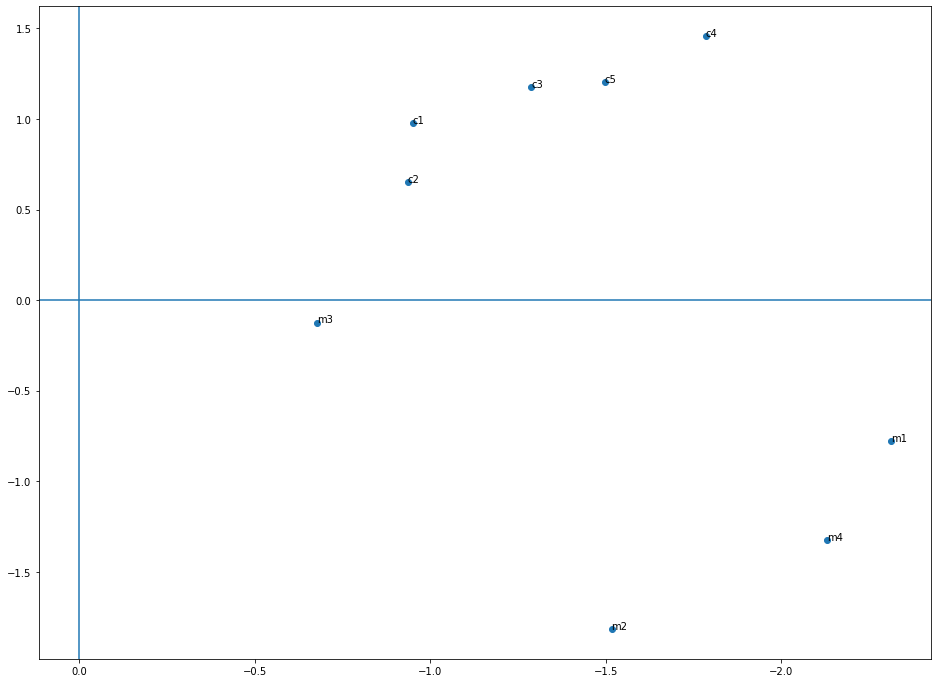

In [15]:
import matplotlib.pyplot as plt

#Visualize documents and print coordinates

doc = Vk_t@Sk
print(doc)

dx = doc[:,0]
dy = doc[:,1]

plt.figure(figsize=(16,12))

plt.scatter(dx, dy)
plt.gca().invert_xaxis()

for i, label in enumerate(docName):
    plt.text(dx[i], dy[i], label)
    
plt.axhline(0, c = 'tab:blue', ls = '-')
plt.axvline(0, c = 'tab:blue', ls = '-')

##### Expected
```CPP
[[-0.94988891  0.97849257]
 [-0.93614095  0.65153215]
 [-1.28819443  1.17773875]
 [-1.78434956  1.4577184 ]
 [-1.49687945  1.20267446]
 [-2.31146688 -0.77935904]
 [-1.51626218 -1.81635909]
 [-0.67841483 -0.12374577]
 [-2.12963317 -1.32341543]]
```

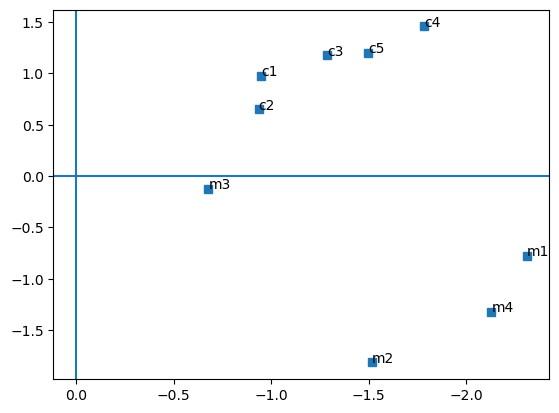

### Visualize terms in 2D space

[[-1.89071562  1.35276825]
 [-1.3922137   1.57762168]
 [-0.58967885  0.70287296]
 [-1.94325227  0.50066913]
 [-1.22892939  0.45931522]
 [-0.74695242  0.65107273]
 [-0.96763621  0.08642905]
 [-0.53186185 -0.24173347]
 [-0.5288969  -0.33606505]
 [-0.5288969  -0.33606505]
 [-1.43110318 -1.16641399]
 [-1.61179732 -1.65475107]
 [-0.95778872 -0.60667296]
 [-0.95778872 -0.60667296]
 [-0.95778872 -0.60667296]
 [-0.7862911  -0.90585858]]


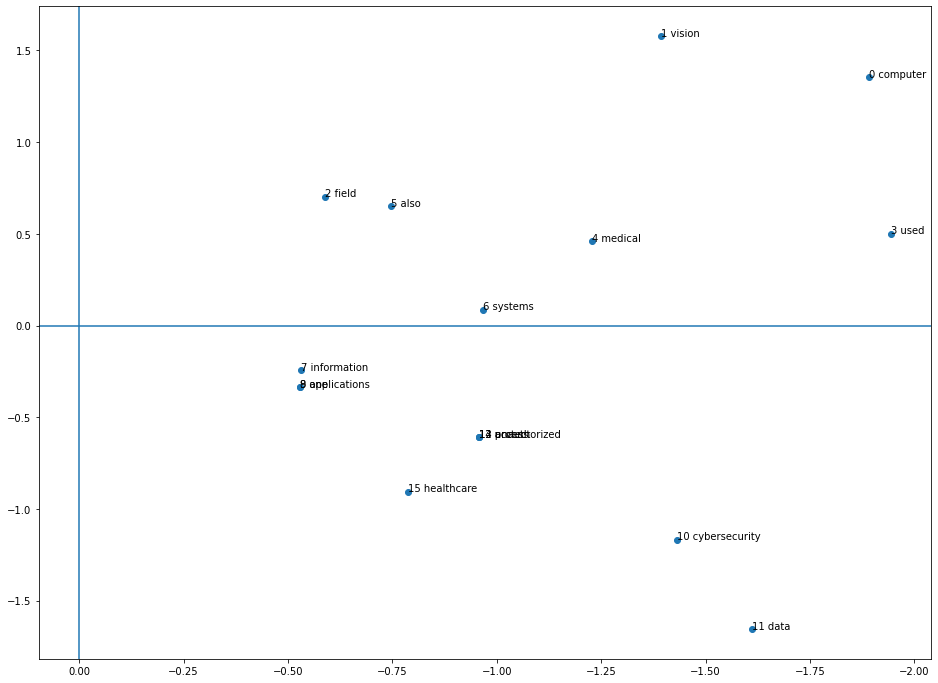

In [16]:
#Visualize terms and print coordinates

terms = Uk@Sk
print(terms)

tx = terms[:,0]
ty = terms[:,1]

plt.figure(figsize = (16,12))

plt.scatter(tx, ty)
plt.gca().invert_xaxis()

for i, label in enumerate(word_to_ix.keys()):
    plt.text(tx[i], ty[i], str(i)+' '+label)
    
plt.axhline(0, c = 'tab:blue', ls = '-')
plt.axvline(0, c = 'tab:blue', ls = '-')

##### Expected
Note: the order of rows could be different in your implementation as it is based on the indexing of the tokens done in build_word_to_ix
```CPP
[[-0.58967885  0.70287296]
 [-1.3922137   1.57762168]
 [-0.53186185 -0.24173347]
 [-1.89071562  1.35276825]
 [-0.5288969  -0.33606505]
 [-0.5288969  -0.33606505]
 [-0.74695242  0.65107273]
 [-1.94325227  0.50066913]
 [-1.22892939  0.45931522]
 [-0.96763621  0.08642905]
 [-1.61179732 -1.65475107]
 [-0.95778872 -0.60667296]
 [-0.95778872 -0.60667296]
 [-1.43110318 -1.16641399]
 [-0.95778872 -0.60667296]
 [-0.7862911  -0.90585858]]
```

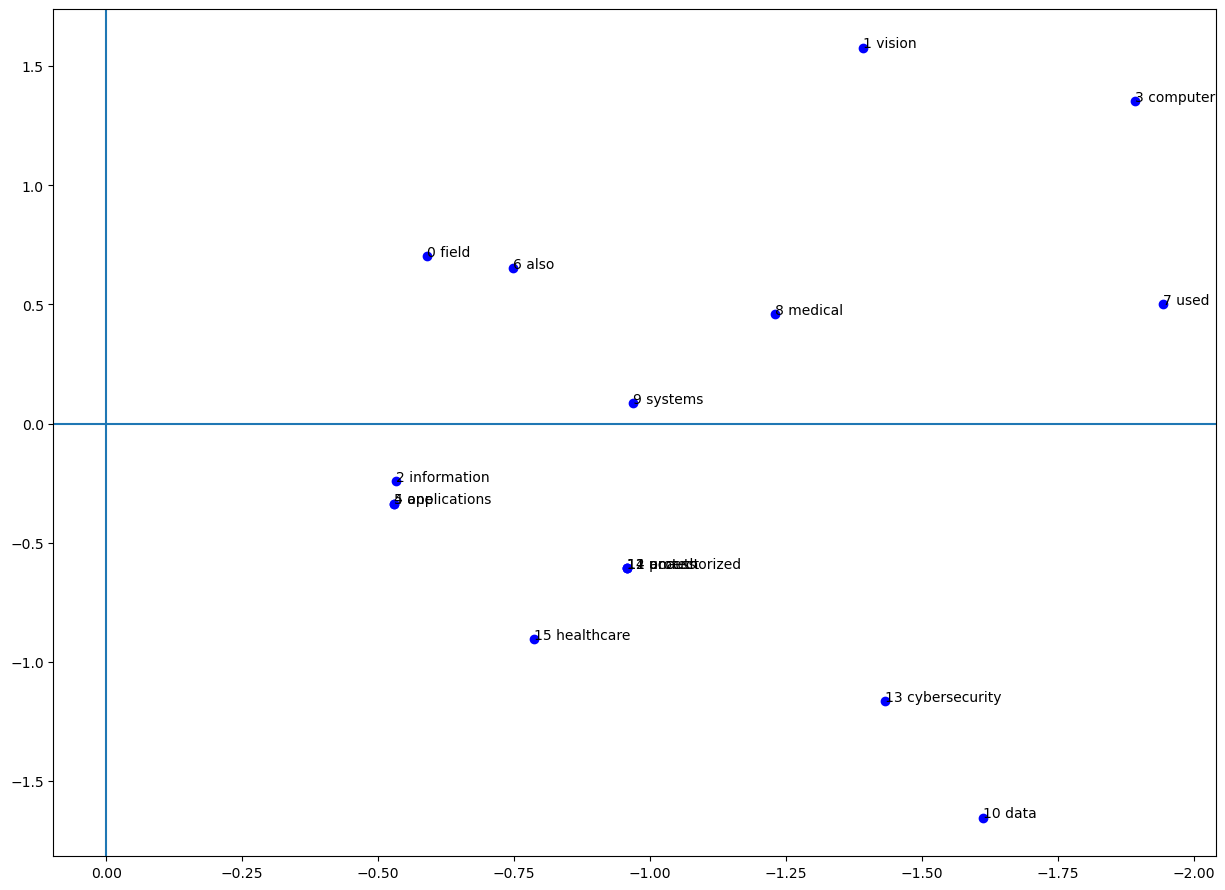

## <CENTER>Task-3 (10 Points)

### Find matching documents for given document

In [17]:
import decimal

# Hint create query vector for input document. Calculate its cosine distance from other documents

def query(s, Uk, Sk, Vk_t, word_to_ix, documents, min_score = 0.9):
    '''
    Input:
        s:query document.
        Uk:Term matrix
        Sk:singular value matrix
        Vk_t:Document matrix
        word_to_ix: {word, index} map
        documents:list of document
        min_score:min score beyond which documents are considerd matching
    Output:
        q_hat: coordinates of query vector
        matches: list of tuples containing matching document and its score
    '''

    A = build_td_matrix([s], word_to_ix)
    
    q_hat = A.T@Uk
    doc = Vk_t@Sk
    
    matches = []
    for d in range(len(doc)):        
        doc_norm = np.linalg.norm(doc.T[:,d])
        q_norm = np.linalg.norm(q_hat)

        cos_sim = float((q_hat@doc.T[:,d] /(doc_norm*q_norm)))
        
        if cos_sim > min_score:
            matches.append((documents[d], cos_sim))
  
    return q_hat, matches

In [18]:
q_hat, matches = query('E-commerce companies use cybersecurity to protect online transactions and prevent fraud.', Uk, Sk, Vk_t, word_to_ix, documents, 0.9)
print(q_hat)
if matches is not None:
    print(matches)
else:
    print("No matches found")

[[-0.51519977 -0.51155458]]
[('One of the most important applications of cybersecurity is in safeguarding sensitive data and personal information, such as financial data or healthcare records.', 0.9956454663736863), ('In the healthcare industry, cybersecurity is used to protect medical devices and prevent unauthorized access to patient data.', 0.974610647387395)]


##### Expected
```CPP
[-0.51519977 -0.51155458]
[('One of the most important applications of cybersecurity is in safeguarding sensitive data and personal information, such as financial data or healthcare records.', 0.9956454663736864), ('In the healthcare industry, cybersecurity is used to protect medical devices and prevent unauthorized access to patient data.', 0.9746106473873951)]
```

### Visual representation of query/document

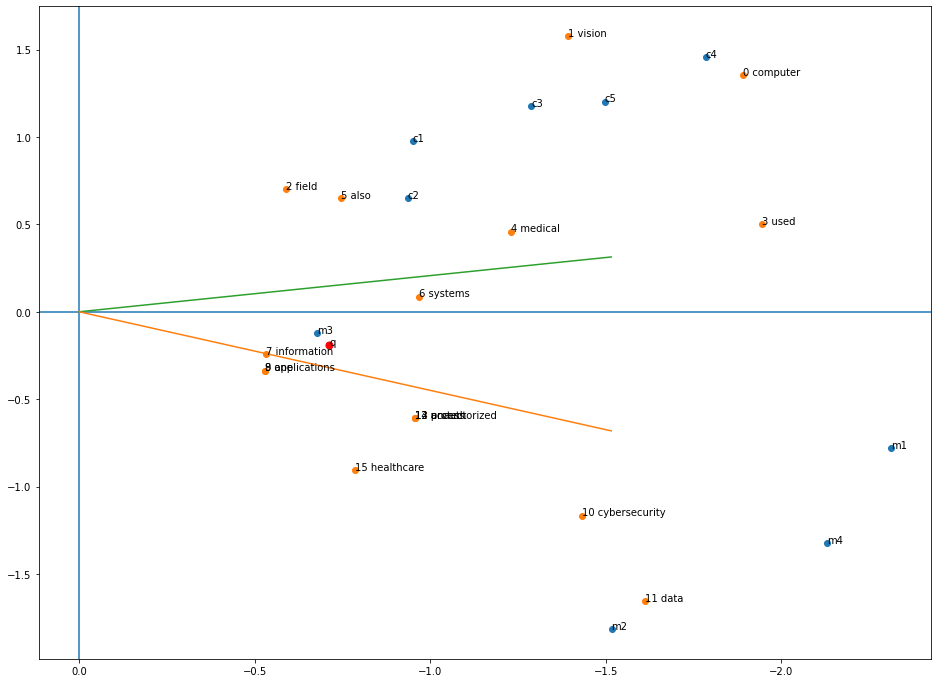

In [19]:
# Plot terms, documents and query documents along with lines representing its cosine angle 
plt.figure(figsize = (16,12))
plt.gca().invert_xaxis()

plt.scatter(q_hat[0][0] / np.arccos(0.75), q_hat[0][1] * np.arccos(0.93), c = 'red', s = 50)
plt.text(q_hat[0][0] / np.arccos(0.75), q_hat[0][1] * np.arccos(0.93), 'q')

plt.scatter(dx, dy)

for i, label in enumerate(docName):
    plt.text(dx[i], dy[i], label)

plt.scatter(tx, ty)

for i, label in enumerate(word_to_ix.keys()):
    plt.text(tx[i], ty[i], str(i)+' '+label)
    
plt.axhline(0, c = 'tab:blue', ls = '-')
plt.axvline(0, c = 'tab:blue', ls = '-')

plt.plot([0, q_hat[0][0] - 1], [0, q_hat[0][1] + np.cos(0.6)], c = 'tab:green')
plt.plot([0, q_hat[0][0] - 1], [0, q_hat[0][1] - np.cos(1.4)], c = 'tab:orange')


**Expected Value**
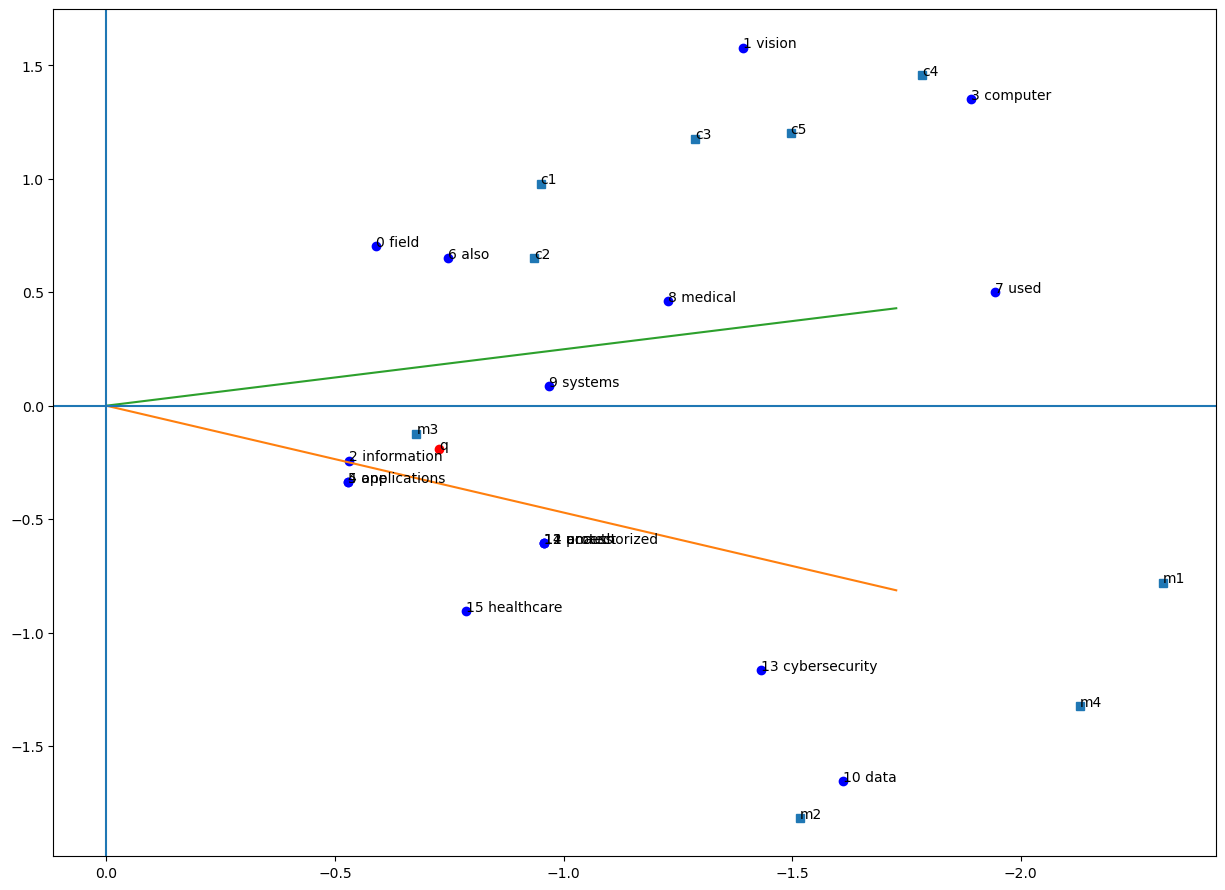

## **Theory questions: (5 points)**
- A) Give short description of Left-eigen vectors, right-eigen vectors and eigen-values matrix retured by Singular Value Decompostion of document-terms count matrix.
- B) Visually represent the document "Graph and tree generation" in 2D space along with words and documents as given in previous question.

#**A)** <br>
Singular Value Decomposition (SVD) is a matrix factorization technique that can be applied to a document-term count matrix to extract its underlying latent semantic structure. When SVD is applied to the document-term count matrix, it returns three matrices:

The left singular vectors, also known as left-eigen vectors, which represent the relationship between the documents in the corpus. Each left-eigen vector corresponds to a specific concept or topic, and its values indicate the strength of the association between that topic and each document.

The right singular vectors, also known as right-eigen vectors, which represent the relationship between the terms in the corpus. Each right-eigen vector corresponds to a specific concept or topic, and its values indicate the strength of the association between that topic and each term.

The singular values, which represent the importance of each topic or concept. The larger the singular value, the more important the corresponding topic is in the corpus.

Together, the left-eigen vectors, right-eigen vectors, and singular values form the eigenvalue matrix. The eigenvalue matrix is a diagonal matrix that contains the singular values on its diagonal, and zeros elsewhere. It is used to reconstruct the original document-term count matrix by multiplying the left-eigen vectors, the right-eigen vectors, and the eigenvalue matrix together.

Overall, the left and right-eigen vectors and the eigenvalue matrix obtained through SVD provide a way to represent the underlying semantic structure of a document-term count matrix, and can be used for tasks such as topic modeling, document classification, and information retrieval.

Mathematical expression: <br>
Any rectangular matrix, for example $m\times n$ of terms and documents, A, can be decomposed into the product of three other matrices: $$M = U_{k} * S_{k} * V_{k}^{T}$$ such that $U_{k}$ and $V_{k}$ are the columns and $S_{k}$ is the diagonal. $Vk^T$ is the conjugate transpose of $V_{k}$. $U_{k}$ and $V_{k}$ are the matrices of left and right singular vectors and $S_{k}$ is the diagonal matrix of singular values.

#B) 

In [20]:
q_hat, matches = query('Graph and tree generation', Uk, Sk, Vk_t, word_to_ix, documents, 0.9)
print(q_hat)
if matches is not None:
    print(matches)
else:
    print("No matches found")

[[0. 0.]]
[]


<ipython-input-17-3da495294b8f>:30: RuntimeWarning: invalid value encountered in true_divide
  cos_sim = float((q_hat@doc.T[:,d] /(doc_norm*q_norm)))


# Observation: <br>

There are no words that match "Graph and tree generation" in the document, so it returns an empty list. Since, it returns [0,0] the cos_sim will be not defined which inturn throws an error. Therefore, I can't plot a visual 2D plot for the same.

# Q2. n-Gram Language Models (35 points)

Your task is to train n-gram language models. [Ref SLP Chapter 3]

- Task 1: You will train unigram, bigram, and trigram models on given training files. Then you will score on given test files for unigram, bigram, and trigram. you will generate sentences from the trained model and compute perplexity.
- Task 2: You will create training data for n > 3. and Repeat the above task from training model.
<h6>Part-A = (55 Points) </h6>

In [21]:
'''
Your imports go here
You are encouraged to implement your own functions and not use from library.
'''
import sys
from collections import Counter
import numpy as np

In [22]:
# constants to define pseudo-word tokens
# access via UNK, for instance
# for this assignemnt we will follow <s> tag for beginning of sentence and
# </s> for end of senetence as suggested in SLP Book. Check sample training files for reference.
UNK = "<UNK>"
SENT_BEGIN = "<s>"
SENT_END = "</s>"

We need to initialise global variables for model

In [23]:

"""Initializes Parameters:
  n_gram (int): the n-gram order.
  is_laplace_smoothing (bool): whether or not to use Laplace smoothing
  threshold: words with frequency  below threshold will be converted to token
"""
# Initializing different object attributes
n_gram = 3
is_laplace_smoothing = True
vocab = [] 
n_gram_counts = {}
n_minus_1_gram_counts = None
threshold = 1


### Implement training function (10 points)

In [24]:
# from nltk import ngrams
import string

def make_ngrams(tokens: list, n: int) -> list:
    """Creates n-grams for the given token sequence.
    Args:
    tokens (list): a list of tokens as strings
    n (int): the length of n-grams to create

    Returns:
    list: list of tuples of strings, each tuple being one of the individual n-grams
    """
    n_grams = []
    
#     tokens = tokens.lower()
    
    for t in tokens:
        if t in string.punctuation:
            tokens = tokens.replace(t, ' ') 
    
    n_grams = list(zip(*[tokens[i:] for i in range(n)]))
    
    return n_grams

In [25]:
def train(training_file_path):
    """Trains the language model on the given data. Input file that
    has tokens that are white-space separated, has one sentence per line, and
    that the sentences begin with <s> and end with </s>
    Parameters:
      training_file_path (str): the location of the training data to read

    Returns:
    N Gram Counts, Vocab, N Minus 1 Gram Counts
    """
    with open(training_file_path, 'r') as fh:
        content = fh.read().split() # Read and split data to get list of words
    
    # Get the count of each word
    cnt = Counter()
    for word in content:
        cnt[word] += 1
    
    # Replace the words with <UNK> if count is < threshold(=1)
    content = [UNK if cnt[w] <= 1 else w for w in content]
    
    # count n
    sentence = []
    for w in content:
        if w != '</s>':
            sentence.append(w)
        else:
            break
    n = sentence.count('<s>')+1
    
    # make use of make_n_grams function
    n_grams = make_ngrams(content, n)
    n_gram_counts = dict(Counter(n_grams))
    
    # Get the training data vocabulary
    vocab = list(set(content))
    
    # For n>1 grams compute n-1 gram counts to compute probability
    if n > 1:
        n_minus_1_gram = make_ngrams(content, n-1)
        n_minus_1_gram_counts = dict(Counter(n_minus_1_gram))
    
    return n_gram_counts, vocab, n_minus_1_gram_counts

Output your Trained Data Parameters:

In [26]:
n_gram_counts, vocab, n_minus_1_gram_counts = train("/content/drive/MyDrive/berp-training-tri.txt")
print(n_gram_counts)
print(vocab)

{('<s>', '<s>', "let's"): 196, ('<s>', "let's", 'start'): 163, ("let's", 'start', 'over'): 136, ('start', 'over', '</s>'): 366, ('over', '</s>', '</s>'): 367, ('</s>', '</s>', '<s>'): 6755, ('</s>', '<s>', '<s>'): 6755, ('<s>', '<s>', 'my'): 6, ('<s>', 'my', 'mother'): 1, ('my', 'mother', 'is'): 1, ('mother', 'is', 'coming'): 1, ('is', 'coming', 'to'): 1, ('coming', 'to', 'visit'): 1, ('to', 'visit', 'and'): 1, ('visit', 'and', "i'd"): 1, ('and', "i'd", 'like'): 5, ("i'd", 'like', 'to'): 409, ('like', 'to', 'take'): 8, ('to', 'take', '<UNK>'): 1, ('take', '<UNK>', 'to'): 1, ('<UNK>', 'to', 'dinner'): 1, ('to', 'dinner', '</s>'): 7, ('dinner', '</s>', '</s>'): 224, ('<s>', '<s>', 'new'): 1, ('<s>', 'new', 'query'): 1, ('new', 'query', '</s>'): 1, ('query', '</s>', '</s>'): 2, ('<s>', '<s>', 'now'): 7, ('<s>', 'now', "i'm"): 3, ('now', "i'm", 'interested'): 6, ("i'm", 'interested', 'in'): 33, ('interested', 'in', 'some'): 2, ('in', 'some', 'middle'): 1, ('some', 'middle', 'eastern'): 5, 

### Scoring function (points 5):
Implement Score function that will take input sentence and output probability of given string representing a single sentence.

In [27]:
def score(sentence):
    """Calculates the probability score for a given string representing a single sentence.
    Parameters:
      sentence (str): a sentence with tokens separated by whitespace to calculate the score of
      
    Returns:
      float: the probability value of the given string for this model
    """
    
    # count n
    content = []
    for w in sentence.split():
        if w != '</s>':
            content.append(w)
        else:
            break
            
    n = content.count('<s>')+1
    
    # Split the input sentence and replace out of vocabulary tokens with <UNK>   
    words = sentence.split()
    words = [UNK if w not in vocab else w for w in words]
    
    # Calculate probability for each word and multiply(or take log and sum) them to get the sentence probability
    ng_words =  make_ngrams(words, n)
    
    probablity = 1
    for w in ng_words:
        ng = n_gram_counts.get(w, 0)
        ng_1 = n_minus_1_gram_counts.get(w[:-1], 0)
        
        p = (ng + 1)/(ng_1 + len(vocab))
        probablity *= p
    
    return probablity

In [28]:
with open("/content/drive/MyDrive/hw2-test_seven.txt", 'r') as fh:
    test_content = fh.read().split("\n")
num_sentences_1 = len(test_content)
ten_sentences_1 = test_content[:10]
print("# of test sentences: ", num_sentences_1)
probablities = []

# of test sentences:  100


In [29]:
# print probabilities/score of sentences in test content
probablities = []
for sentence in test_content:
    probablities.append(score(sentence))
probablities = np.array(probablities)
print("Probabilities: ", probablities)
mean = np.mean(probablities)
print("Mean of Probabilities: ", mean)
std_dev = np.std(probablities)
print("Standard Deviation: ", std_dev)

Probabilities:  [2.05676508e-27 2.05676508e-27 2.83385671e-39 2.61564974e-36
 3.07026729e-42 2.61564974e-36 2.41424471e-33 3.60390043e-48
 3.32640010e-45 1.75221782e-21 1.89839417e-24 2.41424471e-33
 2.61564974e-36 1.89839417e-24 2.22834787e-30 1.89839417e-24
 1.75221782e-21 1.89839417e-24 3.07026729e-42 3.07026729e-42
 5.37977706e-63 4.58318809e-57 3.60390043e-48 3.07026729e-42
 3.07026729e-42 2.41424471e-33 2.05676508e-27 2.22834787e-30
 3.60390043e-48 2.83385671e-39 2.61564974e-36 3.60390043e-48
 3.32640010e-45 2.83385671e-39 3.07026729e-42 3.60390043e-48
 2.61564974e-36 2.83385671e-39 3.32640010e-45 2.41424471e-33
 2.61564974e-36 2.83385671e-39 2.83385671e-39 3.07026729e-42
 3.07026729e-42 3.07026729e-42 2.05676508e-27 2.05676508e-27
 3.07026729e-42 3.07026729e-42 3.07026729e-42 2.83385671e-39
 2.05676508e-27 2.05676508e-27 2.05676508e-27 2.41424471e-33
 2.61564974e-36 1.75221782e-21 2.41424471e-33 2.83385671e-39
 1.89839417e-24 3.07026729e-42 2.83385671e-39 2.22834787e-30
 4.23028

### Sentence generation (10 points)
Generate sentence from the above trained model
- To generate next word from a set of probable n-grams and their probabilities check below tutorial:
https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html

In [30]:
def generate_sentence():
    """Generates a single sentence from a trained language model using the Shannon technique.
      
    Returns:
      str: the generated sentence
    """
    # Start with <s> and randomly generate words until we encounter sentence end
    n = len(next(iter(n_gram_counts)))
    last_words = ['<s>'] *(n-1)
    
    # Append sentence begin markers for n>2
    sentence = list(last_words)
    
    # Keep track of previous word for stop condition
    prev_word = '<s>'
    
    if n > 1:
        while prev_word != "</s>":
            
            # Construct the (n-1) gram so far
            new_ng = {k:v for k, v in n_gram_counts.items() if k[:-1] == tuple(last_words)} 
        
            # Get the counts of all available choices based on n-1 gram
            choices = [k[-1] for k in new_ng.keys()] 
        
            # Convert the counts into probability for random.choice() function
            probs = []
            for w in new_ng:
                ng = n_gram_counts.get(w, 0)
                ng_1 = n_minus_1_gram_counts.get(w[:-1], 0)

                p = (ng + 1)/(ng_1 + len(vocab))
                probs.append(p)
        
            next_word = np.random.choice(choices, p = np.array(probs)/sum(probs))
        
            # If <s> is generated, ignore and generate another word  
            while next_word == '<s>':
                next_word = np.random.choice(choices, p = np.array(probs)/sum(probs))

            sentence += [next_word]
            last_words = sentence[-(n-1):]
            prev_word = next_word
        
    else:
      # In case of unigram model, n-1 gram is just the previous word and possible choice is whole vocabulary
      while prev_word != "</s>":
            
        # Convert the counts into probability for random.choice() function
        next_word = np.random.choice(vocab)

        # If <s> is generated, ignore and generate another word
        while next_word == '<s>':
            next_word = np.random.choice(vocab)

        sentence += [next_word]
        
    # Append sentence end markers for n>2
    sentence = ' '.join(sentence + ['</s>'] *(n-2))
    
    return sentence

In [31]:
def generate(n):
    """Generates n sentences from a trained language model using the Shannon technique.
    Parameters:
      n (int): the number of sentences to generate
      
    Returns:
      list: a list containing strings, one per generated sentence
    """
    # Generate sentences one by one and store
    sentences = []
    for i in range(n):
        sentences.append(generate_sentence())
    
    return sentences

In [32]:
sentences = generate(50)
print("Sentences:")
for sentence in sentences:
  print(sentence)

Sentences:
<s> <s> pasand </s> </s>
<s> <s> may i see the menu for ay-caramba </s> </s>
<s> <s> i would like to eat a french restaurant </s> </s>
<s> <s> i still have a car </s> </s>
<s> <s> uh i'd only like to go for thursday dinner </s> </s>
<s> <s> a close inexpensive restaurant </s> </s>
<s> <s> i want breakfast </s> </s>
<s> <s> give me the list again </s> </s>
<s> <s> and that is not too far away than five dollars </s> </s>
<s> <s> japanese sushi bar </s> </s>
<s> <s> let's start over </s> </s>
<s> <s> i'd like to have fettucini for dinner and would like to find an italian restaurant in downtown </s> </s>
<s> <s> i'd like to eat lunch near the bart station </s> </s>
<s> <s> i'd like to eat on monday evening </s> </s>
<s> <s> i like italian food somewhere </s> </s>
<s> <s> how far it is any distance from icksee </s> </s>
<s> <s> how about breakfast </s> </s>
<s> <s> i guess up to about ten dollars in edy's restaurant </s> </s>
<s> <s> i feel like having a nice business dinner </s>

### Evaluate model perplexity (5 points)
Measures the perplexity for the test sequence with your trained model. 
you may assume that this sequence may consist of many sentences "glued together"

The perplexity of the given sequence is the inverse probability of the test set, normalized by the number of words.


In [33]:
# Since this sequence will cross many sentence boundaries, we need to include 
# the begin- and end-sentence markers <s> and </s> in the probability computation. 
# We also need to include the end-of-sentence marker </s> 
# but not the beginning-of-sentence marker <s>) in the total count of word tokens N

def perplexity(test_sequence):
    """.
    Parameters:
      test_sequence (string): a sequence of space-separated tokens to measure the perplexity of

    Returns:
      float: the perplexity of the given sequence
    """ 

    # Replace out of vocab words with <UNK>, already done in score function
    # test_sequence = [token if token in vocab else UNK for token in test_sequence.split()]
    
    # Remove sentence begin markers from data for computing N
    seq = test_sequence.replace('<s>', '')
    N = len(seq.split())

    # Get the probability for the sequence
    p = score(test_sequence)
    perplexity = (1/p)**(1/N)
    
    return perplexity

In [34]:
print(perplexity(" ".join(sentences[0:10])))

85.84312699307475


### **Explore and explain: (5 points)**
* Experiment n_gram model for n = [1,2,3..7] of your choice. Explain the best choice of n that generates more meaninful sentences.


**Note: The generate_sentence() use random choice to use the the next word so when you run the code the again, you may get different values as compared to mine.** <br>

Here I have trained and tested uni, bi and tri respectively(using n_gram as 1, 2, 3). For four, five, six, seven I have used tri as training and the n_gram = 4, 5, 6, 7 respectively for testing. <br>

Perplexity for uni: 59.979755688968574 (n_gram = 1) <br>

Perplexity for bi:  43.94000216521172 (n_gram = 2) <br>

Perplexity for tri: 85.84312699307475 (n_gram = 3) <br>

Perplexity for four: 78.03904367382539 (n_gram = 4) <br>

Perplexity for five: 66.58492406987875 (n_gram = 5) <br>

Perplexity for six: 94.45018152267765 (n_gram = 6) <br>

Perplexity for seven: 60.38580335663093 (n_gram = 7) <br>


The perplexity scores for the n-gram models with n ranging from 1 to 7 indicate the quality of the models in predicting the next word in a sentence. The lower the perplexity score, the better the model's performance in generating meaningful sentences. <br>

Based on the experimental data obtained below and the sample sentences generated, it seems to me that when n = 2 the sentences generated are more meaningful. <br>

Also, if we had training data for four, five, six and seven, the testing for the same would be better as in this case we are only using tri as a training parameter for testing four, five, six and seven. <br>

However, it is important to note that the choice of n-gram model depends on the task at hand. For example, if the goal is to generate short phrases or headlines, a unigram or bigram model might be more suitable as it can capture the main idea or topic of the phrase. On the other hand, if the goal is to generate longer and more complex sentences, a higher n-gram model might be more appropriate as it can capture more contextual information and dependencies between words. <br>

# Q3. Classification using LSTM - using Tensorflow (30 Points)
In this part, we will be building a bidirectional LSTM network to train and inference sentiment analysis on IMDB dataset.<br>

If you need a refresher or have never worked with Neural Networks before, here are a few resources:
- https://web.stanford.edu/~jurafsky/slp3/7.pdf
- https://web.stanford.edu/~jurafsky/slp3/9.pdf
- https://colah.github.io/posts/2015-08-Understanding-LSTMs/


Training a neural network model will take time. 
- You can use Google Colab / Kaggle notebooks. You get a free GPU for a limited time to tweak your hyperparameters.
- Without a GPU, You might have to wait longer to experiment.

### Library Imports

In [35]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow_datasets as tfds

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer



### Visualizing data distribution (1 Point)


In [36]:
## Reading the data and removing columns that are not important. 
dataset = pd.read_csv("/content/drive/MyDrive/movie_reviews.csv", sep = ',', encoding = 'latin-1', usecols = lambda col: col not in ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"])

In [37]:
 #######################################################   
 # print head of data frame with help of head function # 
 #######################################################
dataset.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,"Petter Mattei's ""Love in the Time of Money"" is...",positive
4,"Probably my all-time favorite movie, a story o...",positive


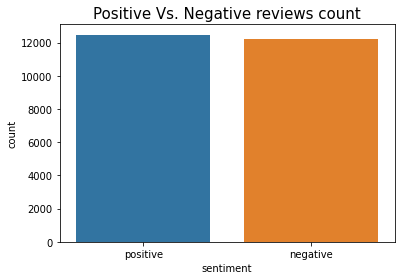

In [38]:
 ####################################################### 
 # plot Positive Vs. Negative reviews count            # 
 #######################################################

sns.countplot(x="sentiment", data=dataset)
plt.title("Positive Vs. Negative reviews count", fontsize = 15)
plt.show()

### Cleaning the Reviews (2 Points)

In [39]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import string
import pandas as pd
import re
import nltk
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')

stopword = nltk.corpus.stopwords.words('english')
wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()
words = set(nltk.corpus.words.words())

# From the first assignment
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"www.\S+", "", text)
    text_links_removed = "".join([char for char in text if char not in string.punctuation])
    text_cleaned = " ".join([word for word in re.split('\W+', text_links_removed)
        if word not in stopword])
    text = " ".join([wn.lemmatize(word) for word in re.split('\W+', text_cleaned)])
    return text

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [40]:
 #############################################################################################  
 # Clean all the reviews in the dataset using the clean_text function provided above         # 
 ############################################################################################# 
for i in range(dataset.shape[0]):
    dataset.iloc[i,0] = clean_text(dataset.iloc[i,0])


In [41]:
 #####################################################################
 # print head of the "CLEANED" data frame with help of head function # 
 #####################################################################
dataset.head()


,review,sentiment
0,one reviewer mentioned watching 1 oz episode y...,positive
1,wonderful little production br br filming tech...,positive
2,thought wonderful way spend time hot summer we...,positive
3,petter matteis love time money visually stunni...,positive
4,probably alltime favorite movie story selfless...,positive


### Splitting the dataset and Encoding Labels (2 Points)

Spliting data: <br> 
80% for the training and the remaining 20% for validation.

Encoding Labels: <br>
Encode labels as negative and positive as 0 and 1 respectively


In [42]:
#################################################################################
# Split the data using the sklearn module                                       #
# 80% for the training and the remaining 20% for validation                     #
#################################################################################
x_train, x_test, y_train, y_test = train_test_split(dataset["review"], dataset["sentiment"],test_size=0.2, random_state=42)

x_train = x_train.to_frame()
x_test = x_test.to_frame()

print("x_train:", x_train.shape)
print("x_test:", x_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


x_train: (19759, 1)
x_test: (4940, 1)
y_train: (19759,)
y_test: (4940,)


In [43]:
#################################################################################
# Initialize label encoder from sklearn module                                  #
# fit on train labels and transform both train and validation labels            #
#################################################################################
label_encoder = LabelEncoder()
train_encoder = label_encoder.fit_transform(y_train)
val_encoder = label_encoder.transform(y_test)


### Pre-Processing The Text (5 Points)
 

In [44]:
# You can use the modules given below
#from tensorflow.keras.preprocessing.sequence import pad_sequences
#from tensorflow.keras.preprocessing.text import Tokenizer

###############################################################################  
# Fit your tokenizer on the training reviews                                  #
###############################################################################
keras_tokenizer  = Tokenizer()
keras_tokenizer.fit_on_texts(x_train['review'])


#################################################################################################
# The word_index dictionary assigns a unique index to each unique word present in the training  #
# reviews.                                                                                      #
#                                                                                               #
# Create the word_index dictionary using the tokenizer                                          #
# Find the vocabulary of your training reviews                                                  #
#################################################################################################

word_index = keras_tokenizer.word_index
vocabulary = keras_tokenizer.word_counts


#################################################################################################
# Convert the reviews in the dataset to their index form by using a function available          #
# with the tokenizer                                                                            #
# HINT : convert training and validation reviews into sequences                                 #
#################################################################################################
train_sequences = keras_tokenizer.texts_to_sequences(x_train['review'])
test_sequences = keras_tokenizer.texts_to_sequences(x_test['review'])


#################################################################################################
# Pad the the training and validation sequences so all of them have the same length             # 
# set maxlen = 200                                                                              #
#################################################################################################

# maxlen which is the maximum length of one review we will use for our training
padded_train_sequences = pad_sequences(train_sequences, maxlen = 200)
padded_test_sequences = pad_sequences(test_sequences, maxlen = 200)

print('Vocabulary : {}'.format(vocabulary))

Vocabulary : OrderedDict([('kid', 2301), ('loved', 1110), ('computer', 414), ('animation', 588), ('although', 1921), ('extremely', 884), ('limited', 221), ('tool', 57), ('almost', 2437), ('nonexistent', 123), ('movie', 39235), ('sat', 224), ('awe', 64), ('watched', 1749), ('amazing', 1018), ('image', 703), ('almosthypnotic', 1), ('music', 2416), ('shaped', 30), ('desire', 264), ('create', 471), ('moving', 643), ('thing', 6270), ('wholepackage', 1), ('deal', 842), ('video', 1243), ('really', 8805), ('pack', 134), ('onetwo', 3), ('punch', 164), ('know', 5497), ('child', 1916), ('want', 3775), ('get', 9782), ('involved', 847), ('must', 2538), ('br', 45308), ('still', 4315), ('20', 539), ('year', 4855), ('later', 1668), ('rate', 501), ('one', 21148), ('top', 1254), ('3', 1142), ('favorite', 1103), ('originality', 151), ('think', 5931), ('unsurpassed', 15), ('today', 997), ('mcmovies', 1), ('hollywood', 1394), ('spit', 50), ('currently', 102), ('wanting', 231), ('see', 9261), ('remake', 508

### Using glove vectors for embedding (5 Points)

GloVe vectors capture both global statistics and local statistics of a corpus. We use GloVe to convert words to embeddings in the vector space based on their semantics. 

We will be using the 200-dimensional GloVe vectors for the task at hand.

To learn more about GloVe please read the following resource:
- https://nlp.stanford.edu/pubs/glove.pdf

In [45]:
glove_dictionary = {}
with open('/content/drive/MyDrive/glove.6B.200d.txt', encoding = 'utf-8') as file:
    for each_line in file:
        words_in_line, coeff_cients = each_line.split(maxsplit = 1)
        coeff_cients = np.array(coeff_cients.split(),dtype = float)
        glove_dictionary[words_in_line] = coeff_cients

In [46]:
 # All the words which are not in the GloVe dictionary will be assigned a zero vector.

embedding_matrix = np.zeros((len(vocabulary), 200))

######################################################################
# The glove_dictionary contains words vs their respective embeddings #
#                                                                    #
# Create the embedding matrix using the glove_dictionary             #
######################################################################
for word, index in word_index.items():
    embedding_vector = glove_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index, :] = embedding_vector


In [47]:
embedding_matrix.shape

(99734, 200)

Sample output : (99987, 200)

### Creating The Model (10)

If you need a refresher or have never worked with Neural Networks before, here are a few resources:
- https://web.stanford.edu/~jurafsky/slp3/7.pdf
- https://web.stanford.edu/~jurafsky/slp3/9.pdf
- https://colah.github.io/posts/2015-08-Understanding-LSTMs/


Training a neural network model will take time. 
- You can use Google Colab / Kaggle notebooks. You get a free GPU for a limited time.
- Without a GPU, You might have to wait longer to experiment.


Useful resources : <br>
https://www.tensorflow.org/api_docs/python/tf/keras/Sequential <br>
https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense <br>
https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout <br>





In [48]:
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.metrics as metrics
from tensorflow.keras.layers import LSTM, Bidirectional, Dropout, Dense, Input, Embedding

tf.random.set_seed(42)

######################################################
# Complete this linear model in tensorflow           #
######################################################

def build_model(embedding_matrix):

    ''' 
  Arguments:
    embedding_matrix : a matrix with the corresponding embeddings
    of all words.

  Returns:
    The LSTM model that you created.
    '''
  
    model = tf.keras.Sequential()

  # TO DO: layer 1 : add embedding layer
  # The embedding layer maps the words to their embedding vectors from the embedding matrix
    model.add(Embedding(len(vocabulary), 200, input_length = 200, weights = [embedding_matrix], trainable = False))

  # TO DO: layer 2 : add Bidirectional LSTM Layer 
    model.add(Bidirectional(LSTM(128)))


  # TO DO Add more layers : you can add more dense layers and dropout
  # NOTE : You should be able to achieve an validation accuracy greater than 85%
  #        within 10 epochs
    model.add(Dense(64))
    model.add(Dropout(0.5))

    model.add(Dense(32))
    model.add(Dropout(0.5))
              
    model.add(Dense(16))
    model.add(Dropout(0.5))
              
  # TO DO Final layer : add output layer and activation 
    model.add(Dense(1, activation = 'sigmoid'))


  # TO DO : use a loss function, optimizer as adam to compile 
  # and evaluate model on auc,precision,recall,accuracy
  # HINT : choose your loss function based on the task (binary classification)
    adam = keras.optimizers.Adam(learning_rate = 0.0001)
    model.compile(optimizer=adam, loss='binary_crossentropy', 
                  metrics = ['acc', metrics.Precision(), metrics.Recall(), metrics.AUC()])
  
    return model

In [49]:
# NOTE : You should be able to achieve an validation accuracy greater than 85%
#        within 10 epochs

#################################################################
# Call the build_model function and initialize the model        #
#################################################################
lstm_model = build_model(embedding_matrix)

#######################################################################################################
# train and validate the model on the padded sequences of text which we have created initially        #
#######################################################################################################
evaluate = lstm_model.fit(padded_train_sequences, train_encoder, 
                          validation_data=(padded_test_sequences, val_encoder),
                          batch_size = 64, epochs = 10)

Epoch 1/10
309/309 [==============================] - 17s 29ms/step - loss: 0.6754 - acc: 0.5839 - precision: 0.5856 - recall: 0.6094 - auc: 0.6145 - val_loss: 0.4994 - val_acc: 0.7601 - val_precision: 0.7158 - val_recall: 0.8632 - val_auc: 0.8516
Epoch 2/10
309/309 [==============================] - 10s 32ms/step - loss: 0.5167 - acc: 0.7665 - precision: 0.7673 - recall: 0.7735 - auc: 0.8320 - val_loss: 0.4144 - val_acc: 0.8123 - val_precision: 0.8319 - val_recall: 0.7831 - val_auc: 0.8956
Epoch 3/10
309/309 [==============================] - 8s 26ms/step - loss: 0.4664 - acc: 0.7997 - precision: 0.8019 - recall: 0.8027 - auc: 0.8670 - val_loss: 0.3918 - val_acc: 0.8241 - val_precision: 0.8240 - val_recall: 0.8244 - val_auc: 0.9054
Epoch 4/10
309/309 [==============================] - 12s 40ms/step - loss: 0.4392 - acc: 0.8145 - precision: 0.8173 - recall: 0.8160 - auc: 0.8838 - val_loss: 0.4179 - val_acc: 0.8081 - val_precision: 0.7534 - val_recall: 0.9162 - val_auc: 0.9094
Epoch 5/1

### Plotting Accuracy and Losses (5 Points)
 




In [51]:
####################################
# PLOT :                           #
# train loss vs val loss           #
# train auc vs val auc             #
# train recall vs val recall       #
# train precision vs val precision #
# train accuracy vs val accuracy   #
####################################
train_loss = evaluate.history['loss']
train_acc = evaluate.history['acc']
train_precision = evaluate.history['precision']
train_recall = evaluate.history['recall']
train_auc = evaluate.history['auc']

val_loss = evaluate.history['val_loss']
val_acc = evaluate.history['val_acc']
val_precision = evaluate.history['val_precision']
val_recall = evaluate.history['val_recall']
val_auc = evaluate.history['val_auc']

epoches = [i for i in range(1,11)]


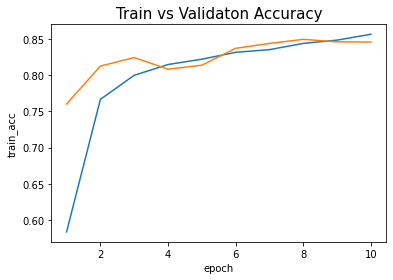

In [52]:
columns = ['epoch', 'train_acc', 'val_acc']
a_data = pd.DataFrame(np.column_stack([epoches, train_acc, val_acc]), columns = columns)
sns.lineplot(data = a_data, x = "epoch", y = "train_acc")
sns.lineplot(data = a_data, x = "epoch", y = "val_acc")
plt.title("Train vs Validaton Accuracy", fontsize = 15)
plt.show()

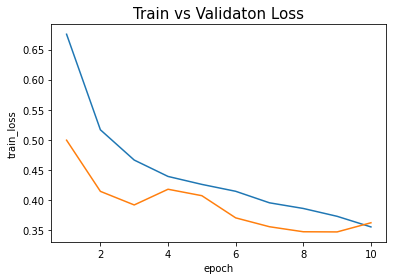

In [53]:
columns = ['epoch', 'train_loss', 'val_loss']
l_data = pd.DataFrame(np.column_stack([epoches, train_loss, val_loss]), columns = columns)
sns.lineplot(data = l_data, x = "epoch", y = "train_loss")
sns.lineplot(data = l_data, x = "epoch", y = "val_loss")
plt.title("Train vs Validaton Loss", fontsize = 15)
plt.show()

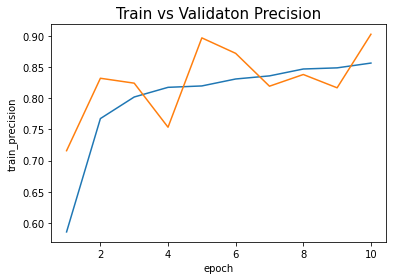

In [54]:
columns = ['epoch', 'train_precision', 'val_precision']
p_data = pd.DataFrame(np.column_stack([epoches, train_precision, val_precision]), columns = columns)
sns.lineplot(data = p_data, x = "epoch", y = "train_precision")
sns.lineplot(data = p_data, x = "epoch", y = "val_precision")
plt.title("Train vs Validaton Precision", fontsize = 15)
plt.show()

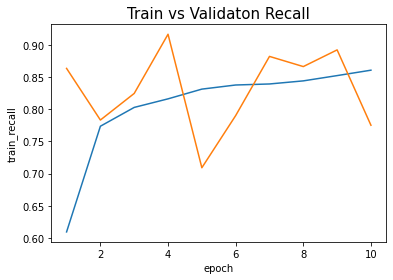

In [55]:
columns = ['epoch', 'train_recall', 'val_recall']
r_data = pd.DataFrame(np.column_stack([epoches, train_recall, val_recall]), columns = columns)
sns.lineplot(data = r_data, x = "epoch", y = "train_recall")
sns.lineplot(data = r_data, x = "epoch", y = "val_recall")
plt.title("Train vs Validaton Recall", fontsize = 15)
plt.show()

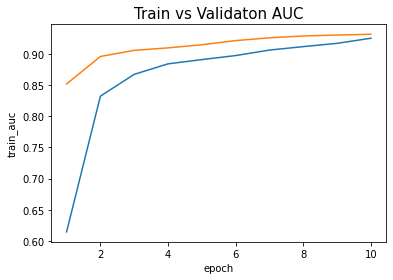

In [56]:
columns = ['epoch', 'train_auc', 'val_auc']
auc_data = pd.DataFrame(np.column_stack([epoches, train_auc, val_auc]), columns = columns)
sns.lineplot(data = auc_data, x = "epoch", y = "train_auc")
sns.lineplot(data = auc_data, x = "epoch", y = "val_auc")
plt.title("Train vs Validaton AUC", fontsize = 15)
plt.show()

In [57]:
# You will need to include the pickled model along with the other submission files
# The saved model will be used to verify your lstm's predictions on hidden reviews

##################################################################################
# Save your trained model as a pickle file named "lstm_classifier"               #
# You will be using this saved model to make predictions in the next module      #
##################################################################################

import pickle 
with open('lstm_classifier', 'wb') as files:
    pickle.dump(lstm_model, files)


Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......bidirectional
.........backward_layer
............cell
...............vars
..................0
..................1
..................2
............vars
.........forward_layer
............cell
...............vars
..................0
..................1
..................2
............vars
.........layer
............cell
...............vars
............vars
.........vars
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
......dense_3
.........vars
............0
............1
......dropout
.........vars
......dropout_1
.........vars
......dropout_2
.........vars
......embedding
.........vars
............0
...metrics
......auc
.........vars
............0
............1
............2
............3
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
........

### Prediction (5 Points)

In [58]:
######################################################################
# Load your saved model                                              #
# Use the saved model to make predictions                            #
######################################################################
with open('lstm_classifier' , 'rb') as f:
    saved_model = pickle.load(f)


Keras model archive loading:
File Name                                             Modified             Size
metadata.json                                  2023-03-12 21:39:40           64
config.json                                    2023-03-12 21:39:40         5128
variables.h5                                   2023-03-12 21:39:40     84126088
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers
......bidirectional
.........backward_layer
............cell
...............vars
..................0
..................1
..................2
............vars
.........forward_layer
............cell
...............vars
..................0
..................1
..................2
............vars
.........layer
............cell
...............vars
............vars
.........vars
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
......dense_3
.........vars
...

In [59]:
# use the saved model to predict the reviews
def predict_review(review):
    '''
  Arguments:
    review : A single review for which you want to predict the sentiment for.
             example: "This movie was amazing! I would defenitely watch it again."

  Returns:
    The predicted sentiment for the review : either 1 or 0
    '''

 ############################################################################# 
 # Predict the sentiment for the given review using the model                #
 # that you trained and return the sentiment                                 #
 #                                                                           #
 # HINT : Remember that the review needs to be "preprocessed" before you use #
 # it for prediction                                                         #
 #############################################################################
    review = clean_text(review)
    review_seq = keras_tokenizer.texts_to_sequences([review])
    review_seq = pad_sequences(review_seq, maxlen=200)
    p = saved_model.predict(review_seq)[0]
    if p > 0.5:
        return 1
    else: 
        return 0
    

In [60]:
# Do not edit this cell

for review in ["If you like original gut wrenching laughter you will like this movie. If you are young or old then you will love this movie, hell even my mom liked it.<br /><br />Great Camp!!!",
                "What a waste of talent. A very poor, semi-coherent, script cripples this film. Rather unimaginative direction, too. Some VERY faint echoes of Fargo here, but it just doesn't come off.",
                "I have seen this film at least 100 times and I am still excited by it, the acting is perfect and the romance between Joe and Jean keeps me on the edge of my seat, plus I still think Bryan Brown is the tops. Brilliant Film.",
                "Cheap, amateurish, unimaginative, exploitative... but don't think it'll have redeeming amusement value. About as unentertaining, uninstructive and just plain dull as a film can be."]:
    p = predict_review(review)
    print(f'{review[:100]} -> {p}')
    

1/1 [==============================] - 1s 1s/step
If you like original gut wrenching laughter you will like this movie. If you are young or old then y -> 1
1/1 [==============================] - 0s 23ms/step
What a waste of talent. A very poor, semi-coherent, script cripples this film. Rather unimaginative  -> 0
1/1 [==============================] - 0s 23ms/step
I have seen this film at least 100 times and I am still excited by it, the acting is perfect and the -> 1
1/1 [==============================] - 0s 23ms/step
Cheap, amateurish, unimaginative, exploitative... but don't think it'll have redeeming amusement val -> 0


### Expected Output:

If you like original gut wrenching laughter you will like this movie. If you are young or old then y -> 1 <br>
What a waste of talent. A very poor, semi-coherent, script cripples this film. Rather unimaginative  -> 0 <br>
I have seen this film at least 100 times and I am still excited by it, the acting is perfect and the -> 1 <br>
Cheap, amateurish, unimaginative, exploitative... but don't think it'll have redeeming amusement val -> 0